In [1]:
!pip3 install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 KB 4.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=e5114158665b8442bb3d6ca3d6af174447c9b472d86b19b7db94368ed411dca8
  Stored in directory: /root/.cache/pip/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import statistics
import math
import os
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import re
pd.set_option('max_colwidth', 800)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
#loading dataset
df=pd.read_excel('/content/PMO translated Cleaned data.xlsx')
df.head()

,Survey Answer ID,Q10\nIs there anything else you would like to share with us?,Q11 translated,Q11\nno-translated
0,f91da0c6-602e-40b0-a96e-aef7469e6ebb,Compliments,thanks,thanks
1,3a836d06-fb1c-41a6-99aa-39202beb281c,Comment on the Service,good,good
2,7f6a288d-d2db-42df-9ee2-aba2b0a782ca,Comment on the Service,NICE SERVICES,NICE SERVICESS
3,c3e1f8d4-2956-4734-9571-6c31656484be,Comment on the Service,page response is unstable. rest is all fine,page respsonse is unstable. rest is all fine
4,a3d6ce90-d5e4-4214-8f14-3899d34e8980,Comment on the Service,THANKS,THANKS


In [4]:
df.shape

(29220, 4)

In [5]:
df.columns

Index(['Survey Answer ID',
       'Q10\nIs there anything else you would like to share with us?',
       'Q11 translated', 'Q11\nno-translated'],
      dtype='object')

In [6]:
### dropping unnecessary columns (id and no translated)
df = df.drop(['Survey Answer ID', 'Q11 translated'], axis=1)
df.head()

,Q10\nIs there anything else you would like to share with us?,Q11\nno-translated
0,Compliments,thanks
1,Comment on the Service,good
2,Comment on the Service,NICE SERVICESS
3,Comment on the Service,page respsonse is unstable. rest is all fine
4,Comment on the Service,THANKS


In [11]:
# renaming the column
df.rename(columns = {'Q10\nIs there anything else you would like to share with us?': 'label', 'Q11\nno-translated' : 'arabictext'}, inplace = True)
df.head()

,label,arabictext
0,Compliments,thanks
1,Comment on the Service,good
2,Comment on the Service,NICE SERVICESS
3,Comment on the Service,page respsonse is unstable. rest is all fine
4,Comment on the Service,THANKS


In [12]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
def trans(s):
  from googletrans import Translator
  #from translate import Translator
  translator = Translator()
  return (translator.translate(s, dest='en').text)

In [16]:
df['text'] = df['arabictext'].apply(trans)
df.head(10)

,label,arabictext,text
0,Compliments,thanks,thanks
1,Comment on the Service,good,good
2,Comment on the Service,NICE SERVICESS,NICE SERVICES
3,Comment on the Service,page respsonse is unstable. rest is all fine,page response is unstable. rest is all fine
4,Comment on the Service,THANKS,THANKS
5,Compliments,thanks,thanks
6,Comment on the Service,رسالة خطأ في النظام,System error message
7,Comment on the Service,Good,Good
8,Comment on the Service,page respsonse is unstable. rest is all fine,page response is unstable. rest is all fine
9,Comment on the Service,VERY GOOD AND WE ARE HAPPY KEEP THE GOOD THING GOING GOOD DAY,VERY GOOD AND WE ARE HAPPY KEEP THE GOOD THING GOING GOOD DAY


In [17]:
df['label'].value_counts()

Comment on the Service    15523
Compliments               10658
others                     1638
Suggestion                 1356
compliments                  44
Compliments\n                 1
Name: label, dtype: int64

In [18]:
df['label'] = df['label'].str.replace('compliments', 'Compliments').replace('Compliments\n', 'Compliments')
df.head()

,label,arabictext,text
0,Compliments,thanks,thanks
1,Comment on the Service,good,good
2,Comment on the Service,NICE SERVICESS,NICE SERVICES
3,Comment on the Service,page respsonse is unstable. rest is all fine,page response is unstable. rest is all fine
4,Comment on the Service,THANKS,THANKS


In [19]:
df['label'].value_counts()

Comment on the Service    15523
Compliments               10703
others                     1638
Suggestion                 1356
Name: label, dtype: int64

### DATA PREPROCESSING

In [20]:
z = {'Comment on the Service' : 0, 'Compliments' : 1, 'Suggestion' : 2, 'others' : 3}  # 1 for truthful reviews and 0 for deceptive reviews
df['label'] = df['label'].map(z)

In [21]:
df.head()

,label,arabictext,text
0,1,thanks,thanks
1,0,good,good
2,0,NICE SERVICESS,NICE SERVICES
3,0,page respsonse is unstable. rest is all fine,page response is unstable. rest is all fine
4,0,THANKS,THANKS


In [22]:
# Cleaning Raw tweets
def clean_text(text):
    
    #remove emails
    text = ' '.join([i for i in text.split() if '@' not in i])
    
    #remove web address
    text = re.sub('http[s]?://\S+', '', text)

    #remove brackets and parantheses (and removing the text inside the brackets and parantheses)
    text = re.sub("[\(\[].*?[\)\]]", "", text)

    #remove punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    
    #Filter to allow only alphabets and numbers
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    #remove double spaces 
    text = re.sub('\s+', ' ', text)

    #remove more than 15 characters
    text = re.sub(r'\b\w{16,}\b', '', text)
    
    return text

In [23]:
# applying that into function.
df["clean_text"] = df['text'].apply(lambda x: clean_text(x))
df.head()

,label,arabictext,text,clean_text
0,1,thanks,thanks,thanks
1,0,good,good,good
2,0,NICE SERVICESS,NICE SERVICES,NICE SERVICES
3,0,page respsonse is unstable. rest is all fine,page response is unstable. rest is all fine,page response is unstable rest is all fine
4,0,THANKS,THANKS,THANKS


In [24]:
# dropping the uncleaned text column "text"
df = df.drop(['arabictext', 'text'], axis=1)

In [25]:
# renaming the column
df.rename(columns = {'clean_text':'text'}, inplace = True)
df.head()

,label,text
0,1,thanks
1,0,good
2,0,NICE SERVICES
3,0,page response is unstable rest is all fine
4,0,THANKS


In [26]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('english')
print(sw_nltk)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
df['text'][16]

''

In [28]:
# preprocessing the data (removing stopwords, convert the sentence to lower case, and also applying lemmatization to get meaningful words )
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wnl=WordNetLemmatizer()
def clean_text(review):
  review = review.lower()
  review = review.split()
  review = [wnl.lemmatize(word) for word in review if word not in sw_nltk]
  #review = [wnl.lemmatize(word) for word in review if word not in sw_spacy]
  review = [wnl.lemmatize(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  return review

In [29]:
df['text']=df['text'].apply(clean_text)
df.head()

,label,text
0,1,thanks
1,0,good
2,0,nice service
3,0,page response unstable rest fine
4,0,thanks


In [30]:
df['text'][16]

''

Empty rows are present. And single letter words and double letters words are present. So we are removing these.  

In [31]:
#removing single letter words and double letters words 
df['text'] = df['text'].str.replace(r'\b\w{1,2}\b', '', regex=True)
df.head()

,label,text
0,1,thanks
1,0,good
2,0,nice service
3,0,page response unstable rest fine
4,0,thanks


In [32]:
# removing empty rows
df = df[df['text'].apply(lambda x: len(x) > 0)]

In [33]:
df['text'][15]

'thanks'

In [34]:
df.reset_index(inplace=True)
df.head(20)

,index,label,text
0,0,1,thanks
1,1,0,good
2,2,0,nice service
3,3,0,page response unstable rest fine
4,4,0,thanks
5,5,1,thanks
6,6,0,system error message
7,7,0,good
8,8,0,page response unstable rest fine
9,9,0,good happy keep good thing going good day


In [35]:
# dropping the uncleaned text column "text"
df = df.drop(['index'], axis=1)
df.head()

,label,text
0,1,thanks
1,0,good
2,0,nice service
3,0,page response unstable rest fine
4,0,thanks


In [36]:
# after cleaning the data, we have 26618 rows
df.shape

(26618, 2)

### Removing names

In [37]:
# function to remove names
def remove_names(text):
    # define regular expression pattern to match names
    pattern = re.compile(r'\b(?:abd|abdouli|abdul|abdulaziz|adel|abdullah|abdulrahman|abrar|abeer|abi|adn|adu|ahmad|ahmed|ahood|aht|alabdooli|alabdouli|alachram|alaghbari|alc|alhamdulillah|alhamoor|ali|alia|alif|alkindi|allah|allhumdulliah|allo|alqubaisi|alsalaam|alsoor|alykom|amal|amata|amed|amen|amer|amis|ammar|amoudi|amra|amsat|amwal|ana|andrew|anf|anz|aqsa|atta|atleat|asharj|ashkram|asif|asim|asma|asmaa|awael|awatef|ayash|ayisha|ayman|azhar|azza|badr|badria|badriya|bahia|bakr|balakrishnan|balooshi|balushi|baniyas|bara|baraem|barsh|bastaki|batayneh|bilal|bint|biyyat|brian|bthe|budaiwi|issy|ive|jaddaf|jafar|jafiliya|jahili|jalal|jamal||janan|janoubi|jasmine|jassim|jazak|jazeera|jebel|jeel|jihadjoseline|juma|jumaia|jvc|kalba|kalban|kareem|katyn|kawkaba|keji|kenneth|khabisi|khaili|khaimah|khair|khalaf|khaled|khalid|khalifa|khamis|kharma|khatib|khatm|khattab|khazna|khor|khorfakkan|kjhgfds|kkk|kmz|konain|kumz|kutty|kvito|kyrgyz|dadsad|sddaddad|sdsds||sha|shaer|shafei|shah|shahama|shakhbout|shama|shamikha|shamkha|shamsa|shamsi|shanahan|sharifa|sharq|shatha|shawamekh|shd|shefaa|shehhi|sheikh|sheikha|shiva|shkran|soo|sooo|soooo|sooooo|soooooo|soumya|sadsadsad|sssasss|suhail|suhaila|suhair|sukkah|szhp|taha|tahaluf|taharba|umm|umrah|xia|yabladi|yas|yasmine|yassin|yousef|youssef|youssefni|ypu|yuen|zaabi|zahir|zakher|zaki|zarooni|zakat|zayed|zina|zindabad|ziyad|zubaida|zuhair)\b', re.IGNORECASE)
    return re.sub(pattern, '', text)

# apply the function to the text column
df['text'] = df['text'].apply(remove_names)

### Preprocess city name

In [38]:
# function to remove places
def replace_places(text):
    # define regular expression pattern to match places
    pattern = re.compile(r'\b(?:abu dhabi|abu|dhabi)\b', re.IGNORECASE)
    return re.sub(pattern, 'abudhabi', text)

# apply the function to the text column
df['text'] = df['text'].apply(replace_places)

In [39]:
x = df['text']
y = df['label']

### FEATURE EXTRACTION USING TFIDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer()
corpii=cv.fit_transform(x) 

In [41]:
feature_names = cv.get_feature_names_out()
len(feature_names)

4911

In [42]:
u1 = pd.DataFrame(corpii.toarray(), columns=feature_names)
u1.head()

,abbreviation,abdel,ability,able,abort,abreast,abroad,absence,absent,absolutely,...,yen,yes,yesterday,yet,young,youth,zero,zip,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TRAIN TEST SPLIT

In [43]:
x = u1
y = df['label']

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7, stratify=y)

### MODEL BUILDING

### LINEAR SUPPORT VECTOR MACHINE

In [45]:
{'Comment on the Service' : 0, 'Compliments' : 1, 'Suggestion' : 2, 'others' : 3} 

{'Comment on the Service': 0, 'Compliments': 1, 'Suggestion': 2, 'others': 3}

In [46]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)
y_pred=lsvm.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Comment on the Service', 'Compliments', 'Suggestion', 'others']))
lsvm =  accuracy_score(y_test, y_pred)
print('accuracy_score: ', lsvm)

[[2461  178   67   13]
 [ 212 1900   12    6]
 [ 147   13  102    6]
 [  65   78    9   55]]
                        precision    recall  f1-score   support

Comment on the Service       0.85      0.91      0.88      2719
           Compliments       0.88      0.89      0.88      2130
            Suggestion       0.54      0.38      0.45       268
                others       0.69      0.27      0.38       207

              accuracy                           0.85      5324
             macro avg       0.74      0.61      0.65      5324
          weighted avg       0.84      0.85      0.84      5324

accuracy_score:  0.8486100676183321


In [47]:
cm = confusion_matrix(y_test, y_pred)

In [48]:
# https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    
    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    
    box_labels = [f"{v1}{v2}".strip() for v1, v2 in zip(group_labels, group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        
        plt.xlabel(stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [49]:
categories = ['Comment on the Service', 'Compliments', 'Suggestion', 'others']


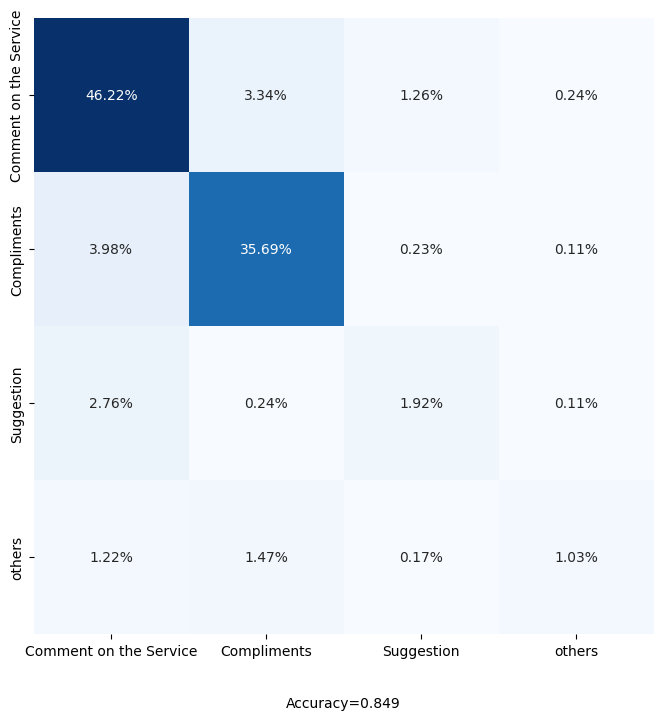

In [50]:
make_confusion_matrix(cm, figsize=(8,8), categories=categories, cbar=False)

### PASSIVE AGGRESSIVE CLASSIFIER

In [51]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
pa.fit(x_train, y_train)
y_pred=pa.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Comment on the Service', 'Compliments', 'Suggestion', 'others']))
pa =  accuracy_score(y_test, y_pred)
print('accuracy_score: ', pa)

[[2251  188  109  171]
 [ 149 1873   16   92]
 [ 101   11  104   52]
 [  41   74   12   80]]
                        precision    recall  f1-score   support

Comment on the Service       0.89      0.83      0.86      2719
           Compliments       0.87      0.88      0.88      2130
            Suggestion       0.43      0.39      0.41       268
                others       0.20      0.39      0.27       207

              accuracy                           0.81      5324
             macro avg       0.60      0.62      0.60      5324
          weighted avg       0.83      0.81      0.82      5324

accuracy_score:  0.8091660405709993


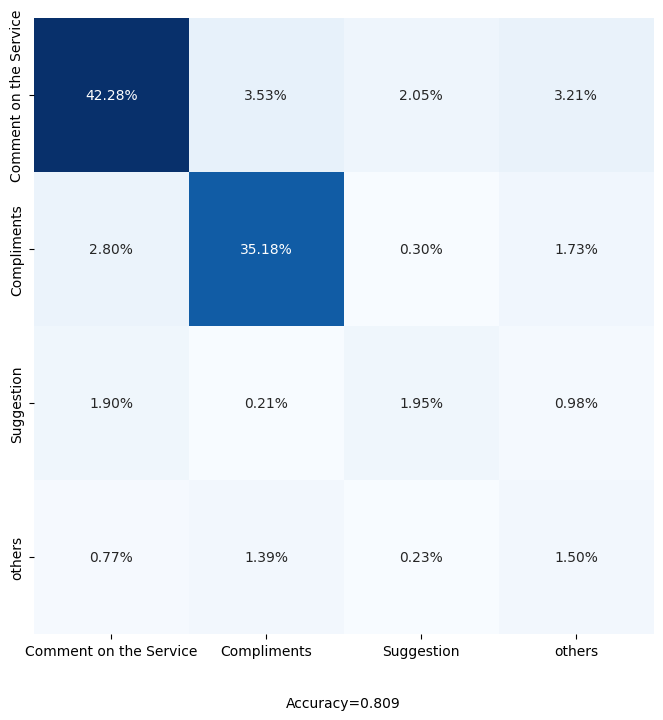

In [52]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm, figsize=(8,8), categories=categories, cbar=False)

### MULTINOMIAL NAIVE BAYES

In [53]:
from scipy.special import nbdtr
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB(alpha=1.0)
mnb.fit(x_train, y_train)
y_pred=mnb.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Comment on the Service', 'Compliments', 'Suggestion', 'others']))
nb =  accuracy_score(y_test, y_pred)
print('accuracy_score: ', nb)

[[2529  172   18    0]
 [ 250 1880    0    0]
 [ 218   10   40    0]
 [  92   77    0   38]]
                        precision    recall  f1-score   support

Comment on the Service       0.82      0.93      0.87      2719
           Compliments       0.88      0.88      0.88      2130
            Suggestion       0.69      0.15      0.25       268
                others       1.00      0.18      0.31       207

              accuracy                           0.84      5324
             macro avg       0.85      0.54      0.58      5324
          weighted avg       0.84      0.84      0.82      5324

accuracy_score:  0.8427873779113448


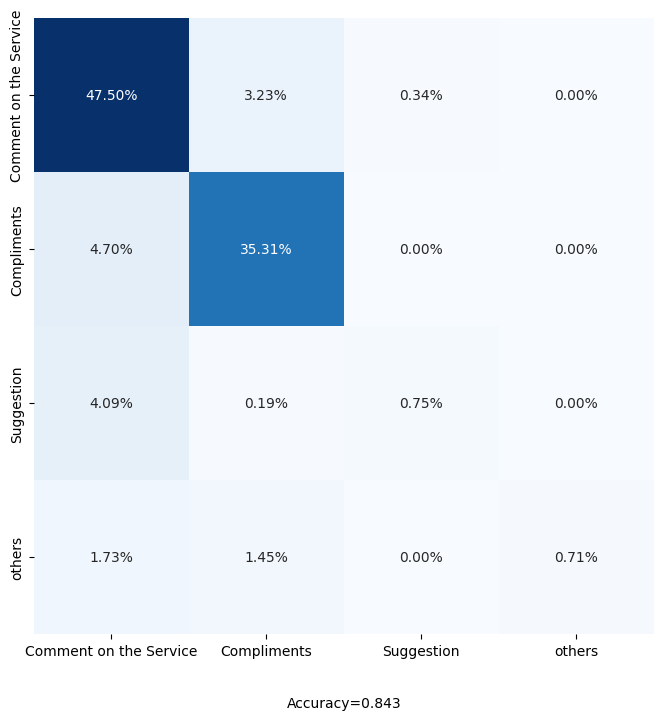

In [54]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm, figsize=(8,8), categories=categories, cbar=False)

### LOGISTIC REGRESSION

In [55]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000) 
log.fit(x_train, y_train)
y_pred=log.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Comment on the Service', 'Compliments', 'Suggestion', 'others']))
log =  accuracy_score(y_test, y_pred)
print('accuracy_score: ', log)

[[2520  163   35    1]
 [ 243 1882    2    3]
 [ 191    7   69    1]
 [  84   70    4   49]]
                        precision    recall  f1-score   support

Comment on the Service       0.83      0.93      0.88      2719
           Compliments       0.89      0.88      0.89      2130
            Suggestion       0.63      0.26      0.37       268
                others       0.91      0.24      0.38       207

              accuracy                           0.85      5324
             macro avg       0.81      0.58      0.63      5324
          weighted avg       0.85      0.85      0.83      5324

accuracy_score:  0.8489857250187829


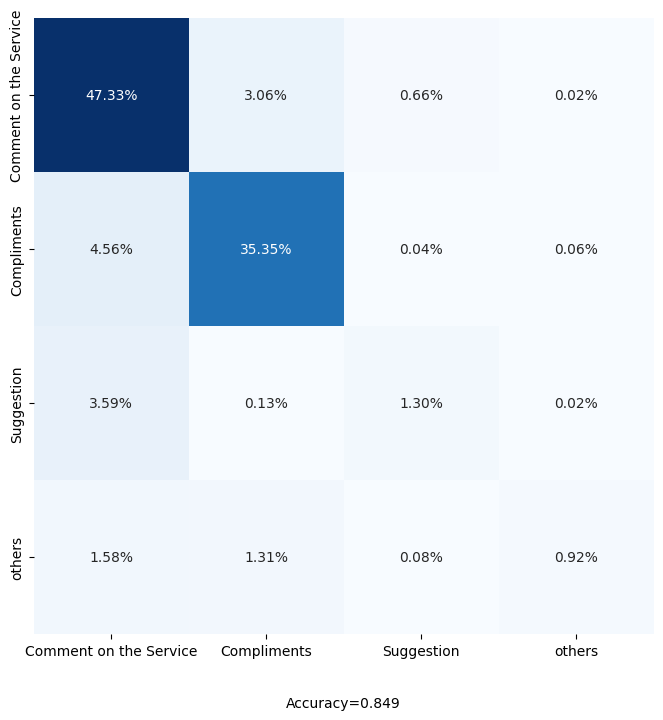

In [56]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm, figsize=(8,8), categories=categories, cbar=False)

### Random forest classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Comment on the Service', 'Compliments', 'Suggestion', 'others']))
rfc =  accuracy_score(y_test, y_pred)
print('accuracy_score: ', rfc)

[[2522  181   11    5]
 [ 200 1922    3    5]
 [ 202   12   53    1]
 [  79   77    0   51]]
                        precision    recall  f1-score   support

Comment on the Service       0.84      0.93      0.88      2719
           Compliments       0.88      0.90      0.89      2130
            Suggestion       0.79      0.20      0.32       268
                others       0.82      0.25      0.38       207

              accuracy                           0.85      5324
             macro avg       0.83      0.57      0.62      5324
          weighted avg       0.85      0.85      0.84      5324

accuracy_score:  0.8542449286250939


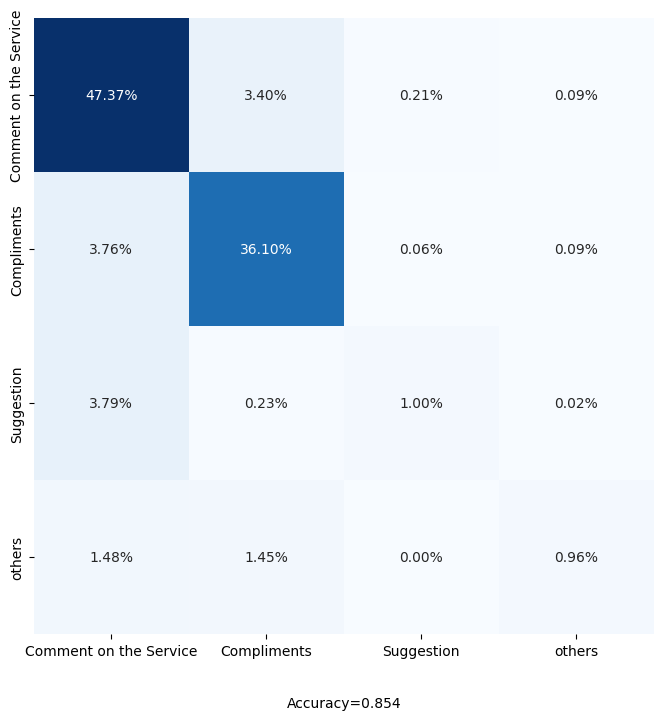

In [58]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm, figsize=(8,8), categories=categories, cbar=False)

### LIGHT GRADIENT BOOSTING CLASSIFIER

In [59]:
import lightgbm as lgb
lgb = lgb.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb.fit(x_train, y_train)
y_pred=lgb.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Comment on the Service', 'Compliments', 'Suggestion', 'others']))
s = accuracy_score(y_test, y_pred)
print('accuracy_score: ', s)

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[[2429  193   83   14]
 [ 191 1924    8    7]
 [ 155   15   96    2]
 [  73   73    6   55]]
                        precision    recall  f1-score   support

Comment on the Service       0.85      0.89      0.87      2719
           Compliments       0.87      0.90      0.89      2130
            Suggestion       0.50      0.36      0.42       268
                others       0.71      0.27      0.39       207

              accuracy                           0.85      5324
             macro avg       0.73      0.61      0.64      5324
          weighted avg       0.84      0.85      0.84      5324

accuracy_score:  0.8459804658151766


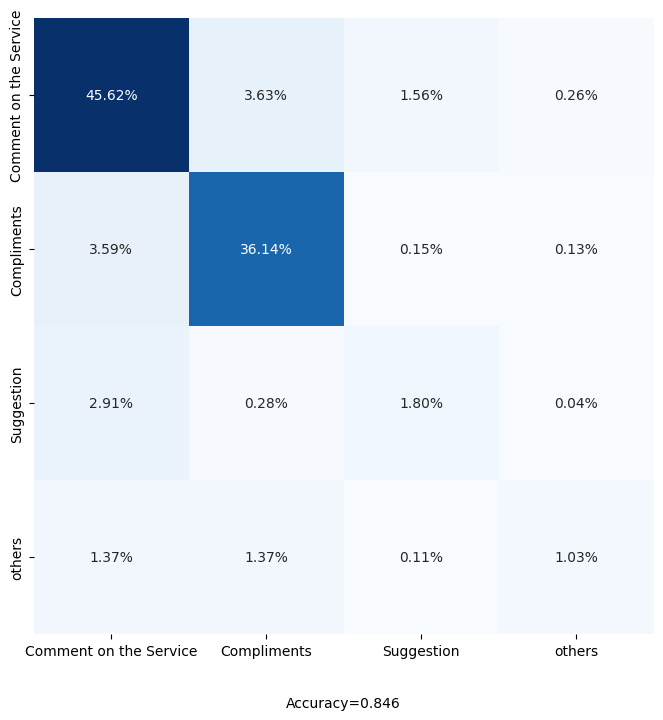

In [60]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm, figsize=(8,8), categories=categories, cbar=False)

### DECISION TREE CLASSIFIER

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Comment on the Service', 'Compliments', 'Suggestion', 'others']))
dtc = accuracy_score(y_test, y_pred)
print('accuracy_score: ', dtc)

[[2376  206  105   32]
 [ 196 1907   17   10]
 [ 132   31   96    9]
 [  57   84   10   56]]
                        precision    recall  f1-score   support

Comment on the Service       0.86      0.87      0.87      2719
           Compliments       0.86      0.90      0.88      2130
            Suggestion       0.42      0.36      0.39       268
                others       0.52      0.27      0.36       207

              accuracy                           0.83      5324
             macro avg       0.67      0.60      0.62      5324
          weighted avg       0.82      0.83      0.83      5324

accuracy_score:  0.8330202854996244


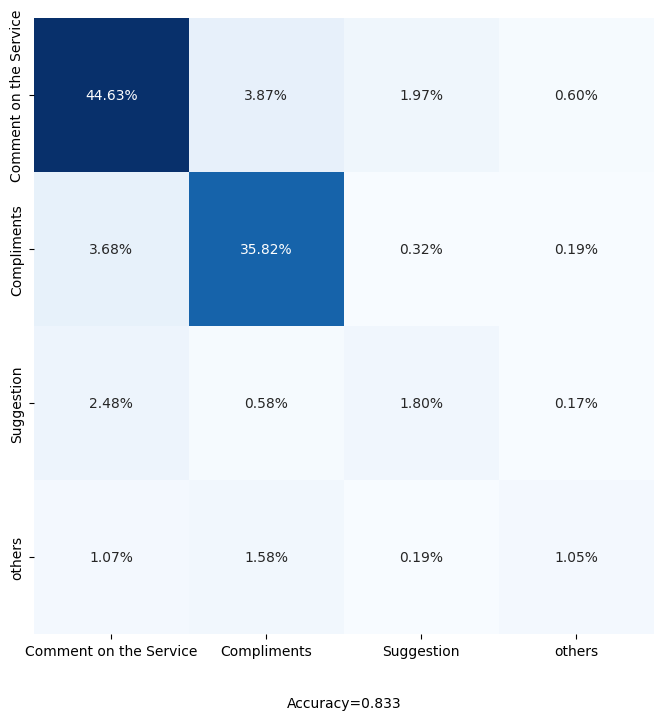

In [62]:
cm = confusion_matrix(y_test, y_pred)
make_confusion_matrix(cm, figsize=(8,8), categories=categories, cbar=False)

### Comparison

In [63]:
accuracy_df = pd.DataFrame({'Model': ['Linear SVM', 'Passive Aggressive classifier', 'Multinomial Naive Bayes', 'Logistic regression', 'Random forest', 'Light GBM', 'Decision tree'], 
                            'Accuracy': [lsvm, pa, nb, log,  rfc, s, dtc]})
accuracy_df

,Model,Accuracy
0,Linear SVM,0.848610
1,Passive Aggressive classifier,0.809166
2,Multinomial Naive Bayes,0.842787
3,Logistic regression,0.848986
4,Random forest,0.854245
5,Light GBM,0.845980
6,Decision tree,0.833020


In [64]:
import warnings
warnings.filterwarnings('ignore')

### Model evaluation

In [65]:
test = "satisfied"
data = [test]
fact = cv.transform(data).toarray()
pred = rf.predict(fact)
#print("pred", pred)
if (int(pred)==0):
  print("Comment on the Service")
elif (int(pred)==1):
  print("Compliments")
elif (int(pred)==2):
  print("Suggestion")
else:
 print("others")

Comment on the Service


In [66]:
test = "Thanks"
data = [test]
fact = cv.transform(data).toarray()
pred = rf.predict(fact)
#print("pred", pred)
if (int(pred)==0):
  print("Comment on the Service")
elif (int(pred)==1):
  print("Compliments")
elif (int(pred)==2):
  print("Suggestion")
else:
 print("others")

Compliments


In [74]:
test = "pls visa stamping process fast taking long"
data = [test]
fact = cv.transform(data).toarray()
pred = rf.predict(fact)
#print("pred", pred)
if (int(pred)==0):
  print("Comment on the Service")
elif (int(pred)==1):
  print("Compliments")
elif (int(pred)==2):
  print("Suggestion")
else:
 print("others")

Suggestion
